In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 10
arms = np.random.rand(n)
eps = 0.1

In [3]:
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

In [19]:
# action-value
av = np.array([np.random.randint(0, (n + 1)), 0]).reshape(1, 2)

def best_arm(a):
    best_arm = 0
    best_mean = 0
    for u in a:
        # mean reward for each action
        avg = np.mean(a[np.where(a[:, 0] == u[0])][:, 1])
        if best_mean < avg:
            best_mean = avg
            best_arm = u[0]
    return best_arm

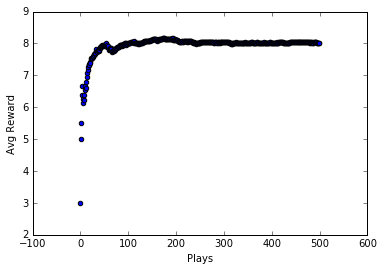

In [20]:
plt.xlabel('Plays')
plt.ylabel('Avg Reward')
for i in range(500):
    if random.random() > eps: # greedy arm selection
        choice = best_arm(av)
    else: # random arm selection
        choice = np.where(arms == np.random.choice(arms))[0][0]
    this_av = np.array([[choice, reward(arms[choice])]])
    av = np.concatenate((av, this_av), axis=0)
    # percentage the correct arm is chosen
    perc_correct = 100 * (len(av[np.where(av[:, 0] == np.argmax(arms))]) * 1. / len(av))
    # mean reward
    running_mean = np.mean(av[:, 1])
    plt.scatter(i, running_mean)

In [21]:
# experiment with different numbers of arms and different values for ϵ

In [22]:
# The problem we've considered here is a stationary problem 
# because the underlying reward probability distributions for each arm do not change over time.

In [23]:
# We certainly could consider a variant of this problem where this is not true, 
# a non-stationary problem. In this case, a simple modification would be 
# to weight more recent action-value pairs greater than distant ones, 
# thus if things change over time, we will be able to track them.

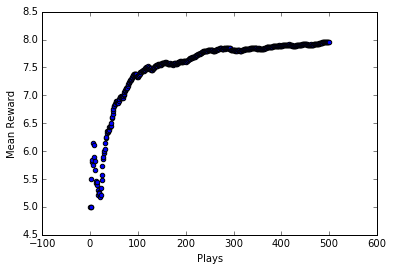

In [29]:
n = 10
arms = np.random.rand(n)
eps = 0.1

av = np.ones(n) # action-value
counts = np.zeros(n) # how many times we've taken a particular action

def reward(prob):
    total = 0
    for i in range(10):
        if random.random() < prob:
            total += 1
    return total

# simpler best_arm function
def best_arm(a):
    return np.argmax(a)

plt.xlabel('Plays')
plt.ylabel('Mean Reward')
for i in range(500):
    if random.random() > eps:
        choice = best_arm(av)
    else:
        choice = np.where(arms == np.random.choice(arms))[0][0]
    counts[choice] += 1
    k = counts[choice]
    rwd = reward(arms[choice])
    old_avg = av[choice]
    new_avg = old_avg + (1. / k) * (rwd - old_avg)
    av[choice] = new_avg
    # weighted average
    running_mean = np.average(av, weights=np.array([counts[j] * 1. / np.sum(counts) for j in range(len(counts))]))
    plt.scatter(i, running_mean)

In [31]:
# τ is a parameter called temperature the scales the probability distribution of actions. 
# A high temperature will tend the probabilities to be very simmilar, whereas a low temperature 
# will exaggerate differences in probabilities between actions. Selecting this parameter requires 
# an educated guess and some trial and error.

In [32]:
# softmax

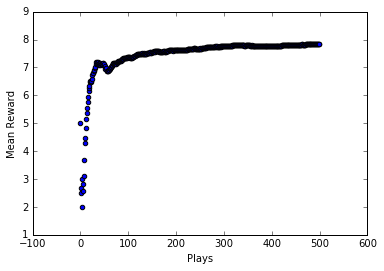

In [36]:
n = 10
arms = np.random.rand(n)

av = np.ones(n) # action-value
counts = np.zeros(n) # how many times we've taken a particular action
av_softmax = np.zeros(n)
av_softmax[:] = 0.1 # initial probability

def reward(prob):
    total = 0
    for i in range(10):
        if random.random() < prob:
            total += 1
    return total

tau = 1.12
def softmax(av):
    normalization_factor = np.sum(np.exp(av[:] / tau))
    probs = np.zeros(n)
    for i in range(n):
        probs[i] = np.exp(av[i] / tau) / normalization_factor
    return probs

plt.xlabel('Plays')
plt.ylabel('Mean Reward')
for i in range(500):
    choice = np.where(arms == np.random.choice(arms, p=av_softmax))[0][0]
    counts[choice] += 1
    k = counts[choice]
    rwd = reward(arms[choice])
    old_avg = av[choice]
    new_avg = old_avg + (1. / k) * (rwd - old_avg)
    av[choice] = new_avg
    av_softmax = softmax(av)
    
    running_mean = np.average(av, weights=np.array([counts[j] * 1. / np.sum(counts) for j in range(len(counts))]))
    plt.scatter(i, running_mean)

In [37]:
# Softmax action selection seems to do at least as well as epsilon-greedy, 
# perhaps even better; it looks like it converges on an optimal policy faster. 
# The downside to softmax is having to manually select the τ parameter. 
# Softmax here was pretty sensitive to τ and it took awhile of playing with it
# to find a good value for it. Obviously with epsilon-greedy we had the parameter
# epsilon to set, but choosing that parameter was much more intuitive.

In [39]:
# The state space for 21 is much much larger than the single state in n-armed bandit.
# In RL, a state is all information available to the agent (the decision maker) at a particular time t.

In [40]:
# So what are all the possible combinations of information available to the agent (the player) in blackjack? 
# Well, the player starts with two cards, so there is the combination of all 2 playing cards. 
# Additionally, the player knows one of the two cards that the dealer has. 
# Thus, there are a lot of possible states (around 200). 
# As with any RL problem, our ultimate goal is to find the best policy to maximize our rewards.

In [41]:
# Our main computational effort, therefore, is in iteratively improving our estimates for the values 
# of states or state-action pairs.
# For example, given the cards total to 20, what is the value of hitting vs staying?

In [42]:
# Problems like the n-armed bandit problem and blackjack have a small enough state or state-action space 
# that we can record and average rewards in a lookup table, giving us the exact average rewards for 
# each state-action pair. Most interesting problems, however, have a state space that is continuous or 
# otherwise too large to use a lookup table. That's when we must use function approximation 
# (e.g. neural networks) methods to serve as our  QQ  function in determining the value of states or state-actions. 

In [43]:
# This is why DeepMind's implementation actually feeds in the last 4 frames of gameplay, 
# effectively changing a non-Markov decision process into an MDP.

In [44]:
# Qk(s,a)Qk(s,a) is the function that accepts an action and state and returns the value of 
# taking that action in that state at time step kk. This is fundamental to RL. 
# We need to know the relative values of every state or state-action pair.

In [45]:
# π is a policy, a stochastic strategy or rule to choose action a given a state s. 
# Think of it as a function, π(s), that accepts state, s and returns the action to be taken. 
# There is a distinction between the π(s) function and a specific policy π. Our implementation 
# of π(s) as a function is often to just choose the action a in state s that has the highest 
# average return based on historical results, argmaxQ(s,a). As we gather more data and 
# these average returns become more accurate, the actual policy π may change. We may 
# start out with a policy of "hit until total is 16 or more then stay" but this policy 
# may change as we gather more data. Our implemented π(s) function, however, 
# is programmed by us and does not change.

In [48]:
# Gt, cumulative return starting from a given state until the end of an episode.

In [47]:
# Episode: the full sequence of steps leading to a terminal state and receiving a return.

In [49]:
# vπ, a function that determines the value of a state given a policy π.

In [2]:
# Monte Carlo
# We'll use random sampling of states and state-action pairs
# and observe rewards and then iteratively revise our policy,
# which will hopefully **converge** on the optimal policy 
# as we explore every possible state-action couple.

In [3]:
# code is functional and stateless

In [1]:
import math
import random

def random_card():
    card = random.randint(1, 13)
    if card > 10:
        card = 10
    return card

def useable_ace(hand):
    val, ace = hand
    return ace and val + 10 <= 21

def total_value(hand):
    val, ace = hand
    if useable_ace(hand):
        return val + 10
    else:
        return val
    
def add_card(hand, card):
    val, ace = hand
    if card == 1:
        ace = True
    return (val + card, ace)

def eval_dealer(dealer_hand):
    while total_value(dealer_hand) < 17:
        dealer_hand = add_card(dealer_hand, random_card())
    return dealer_hand

def play(state, dec):
    player_hand = state[0]
    dealer_hand = state[1]
    if dec == 0: # 1 hit, 0 stay
        dealer_hand = eval_dealer(dealer_hand)
        
        player_tot = total_value(player_hand)
        dealer_tot = total_value(dealer_hand)
        status = 1 # 1 game is on, 2 play won, 3 draw, 4 dealer won
        if dealer_tot > 21 or dealer_tot < player_tot:
            status = 2
        elif dealer_tot == player_tot:
            status = 3
        elif dealer_tot > player_tot:
            status = 4
    elif dec == 1:
        player_hand = add_card(player_hand, random_card())
        dealer_hand = eval_dealer(dealer_hand)
        
        player_tot = total_value(player_hand)
        dealer_tot = total_value(dealer_hand)
        status = 1
        if player_tot == 21:
            if dealer_tot == 21:
                status = 3
            else:
                status = 2
        elif player_tot > 21:
            status = 4
        elif player_tot < 21:
            pass # game continues
    state = (player_hand, dealer_hand, status)
    return state

def init_game():
    status = 1
    player_hand = add_card((0, False), random_card())
    player_hand = add_card(player_hand, random_card())
    dealer_hand = add_card((0, False), random_card())
    
    if total_value(player_hand) == 21:
        if total_value(dealer_hand) != 21:
            status = 2
        else:
            status = 3
            
    state = (player_hand, dealer_hand, status)
    return state

In [13]:
state = init_game()
print(state)

((19, False), (10, False), 1)


In [14]:
state = play(state, 1)
print(state)

((21, False), (20, False), 2)


In [16]:
# We will compress the states a bit by ignoring the useable ace boolean 
# for the dealer's hand because the dealer only shows a single card and 
# if it's an ace the player has no idea if it's useable or not, so it 
# offers no additional information to us.

In [17]:
# Monte Carlo Reinforcement Learning
# use an epsilon-greedy policy function to ensure 
# we have a good balance of exploration versus exploitation

In [18]:
# In essence, with Monte Carlo we are playing randomly initialized games, 
# sampling the state-action pair space and recording returns. In doing so, 
# we can iteratively update our policy π.

In [2]:
import numpy as np

def init_state_space():
    states = []
    for card in range(1, 11):
        for val in range(11, 22):
            states.append((val, False, card))
            states.append((val, True, card))
    return states

def init_state_actions(states):
    av = {}
    for state in states:
        av[(state, 0)] = 0.0
        av[(state, 1)] = 0.0
    return av

def init_SA_count(state_actions):
    counts = {}
    for sa in state_actions:
        counts[sa] = 0
    return counts

# reward = 1 for winning, 0 for draw, -1 for losing
def calc_reward(outcome):
    return 3 - outcome

def update_Q_table(av_table, av_count, returns):
    for key in returns:
        av_table[key] = av_table[key] + (1. / av_count[key]) * (returns[key] - av_table[key])
    return av_table

# avg rewards - Q-value for each action given a state
def qsv(state, av_table):
    if (state, 0) not in av_table:
        av_table[(state, 0)] = 0
    if (state, 1) not in av_table:
        av_table[(state, 1)] = 0
    stay = av_table[(state, 0)]
    hit = av_table[(state, 1)]
    return np.array([stay, hit])

# compress the state
def get_RL_state(state):
    player_hand, dealer_hand, status = state
    player_val, player_ace = player_hand
    return (player_val, player_ace, dealer_hand[0])

In [3]:
epochs = 5000000
epsilon = 0.1

state_space = init_state_space()
av_table = init_state_actions(state_space)
av_count = init_SA_count(av_table)

for i in range(epochs):
    state = init_game()
    player_hand, dealer_hand, status = state
    
    while player_hand[0] < 11:
        player_hand = add_card(player_hand, random_card())
        state = (player_hand, dealer_hand, status)
    rl_state = get_RL_state(state)
    
    returns = {}
    while state[2] == 1:
        act_probs = qsv(rl_state, av_table)
        if random.random() < epsilon:
            action = random.randint(0, 1)
        else:
            action = np.argmax(act_probs)
        sa = (rl_state, action)
        returns[sa] = 0
        if sa not in av_count:
            av_count[sa] = 0
        av_count[sa] += 1
        state = play(state, action)
        rl_state = get_RL_state(state)
    
    for key in returns.keys():
        returns[key] = calc_reward(state[2])
        
    av_table = update_Q_table(av_table, av_count, returns)
print('Done')

Done


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [19]:
#fig = plt.figure(figsize=(8, 6))
#ax = fig.add_subplot(111, projection='3d')

#ax.set_xlabel('Dealer card')
#ax.set_ylabel('Player sum')
#ax.set_zlabel('State-Value')

x,y,z,a = [],[],[],[]
for key in state_space:
    if (not key[1] and key[0] > 11 and key[2] < 21):
        y.append(key[0])
        x.append(key[2])
        state_value = max([av_table[(key, 0)], av_table[(key, 1)]])
        z.append(state_value)
        if av_table[(key, 0)] >= av_table[(key, 1)]:
            a.append(0)
        else:
            a.append(1)
#ax.azim = 230
#ax.plot_trisurf(x,y,z, linewidth=.02, cmap=cm.jet)

In [6]:
# Here we've covered Monte Carlo reinforcement learning methods that depending on stochastically
# sampling the environment and iteratively improving a policy π after each episode. One 
# disadvantage of Monte Carlo methods is that we must wait until the end of an *episode* 
# to update our policy. For some types of problems (like blackjack), this is okay, but 
# in a lot of cases, it makes more sense to be able to learn at each time step (immediately 
# after each action is taken).

In [21]:
import pandas as pd
strategy = pd.DataFrame(zip(x, y, z, a), columns=['Dealer card', 'Player sum', 'State-Value', 'Policy'])
strategy.pivot(index='Player sum', columns='Dealer card', values='Policy')

Dealer card,1,2,3,4,5,6,7,8,9,10
Player sum,,,,,,,,,,
12,1,1,1,1,1,1,1,1,1,1
13,1,1,1,1,0,0,1,1,1,1
14,1,0,0,0,0,0,1,1,1,1
15,1,0,0,0,0,0,1,1,1,1
16,1,0,0,0,0,0,1,1,1,1
17,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0


In [22]:
# The most important thing to learn from all of this is that in 
# essentially any RL method, our goal is to find an optimal Q function. 

In [23]:
# In the next part, I will abandon tabular learning methods and cover 
# Q-learning (a type of temporal difference (TD) algorithm) using a neural
# network as our Q function (what we've all been waiting for).

In [24]:
# Neural nets provide a functional approximator.

In [25]:
# Our Q function actually looks like this: Q(s,a,θ) where θ is 
# a vector of parameters. And instead of iteratively updating values 
# in a table, we will iteratively update the θ parameters of 
# our neural network so that it learns to provide us with better 
# estimates of state-action values.

target: r_t+1 + γ ∗ maxQ(s′, a′) for non-terminal states
        r_t+1 for terminal states (last state in an episode)

In [27]:
# γ is a parameter 0-→1 that is called the discount factor. 
# Basically it determines how much each future reward is taken 
# into consideration for updating our Q-value.

In [28]:
# If γ is close to 0, we heavily discount future rewards and 
# thus mostly care about immediate rewards.

In [29]:
# s′ refers to the new state after having taken action a 
# and a′ refers to the next actions possible in this new state.

In [30]:
# So maxQ(s′, a′) means we calculate all the Q-values for each 
# state-action pair in the new state, and take the maximium value 
# to use in our new value update. 
# (Note I may use s′ and a′ interchangeably with s_t+1 and a_t+1.)

In [31]:
# In on-policy methods we iteratively learn about state values 
# at the same time that we improve our policy. In other words, 
# the updates to our state values depend on the policy. 

In [33]:
# In contrast, off-policy methods do not depend on the policy 
# to update the value function. Q-learning is an **off-policy** method. 
# It's advantageous because with off-policy methods, we can follow 
# one policy while learning about __another__.

In [34]:
# For example, with Q-learning, we could always take completely random
# actions and yet we would still learn about another policy function 
# of taking the best actions in every state. If there's ever a π 
# referenced in the value update part of the algorithm then it's 
# an on-policy method.

In [1]:
import numpy as np

def rand_pair(s, e):
    return np.random.randint(s, e), np.random.randint(s, e)

# finds an array in the "depth" dimension of the grid
def find_loc(state, obj):
    for i in range(4):
        for j in range(4):
            if all(state[i, j] == obj):
                return i, j
            
# initialize stationary grid, all items are placed deterministically
def init_grid():
    state = np.zeros((4, 4, 4))
    # place player
    state[0, 1] = np.array([0, 0, 0, 1])
    # place wall
    state[2, 2] = np.array([0, 0, 1, 0])
    # place pit
    state[1, 1] = np.array([0, 1, 0, 0])
    # place goal
    state[3, 3] = np.array([1, 0, 0, 0])
    
    return state

# initialize player in random location, but keep wall, goal and pit stationary
def init_grid_player():
    state = np.zeros((4, 4, 4))
    # place player
    state[rand_pair(0, 4)] = np.array([0, 0, 0, 1])
    # place wall
    state[2, 2] = np.array([0, 0, 1, 0])
    # place pit
    state[1, 1] = np.array([0, 1, 0, 0])
    # place goal
    state[1, 2] = np.array([1, 0, 0, 0])
    
    # find grid position of player (agent)
    a = find_loc(state, np.array([0, 0, 0, 1])) 
    # find wall
    w = find_loc(state, np.array([0, 0, 1, 0]))
    # find goal
    g = find_loc(state, np.array([1, 0, 0, 0]))
    # find pit
    p = find_loc(state, np.array([0, 1, 0, 0]))
    
    if not all([a, w, g, p]):
        print('Invalid grid. Rebuilding...')
        return init_grid_player()
    
    return state

# initialize grid so that goal, pit, wall, player are all randomly placed
def init_grid_rand():
    state = np.zeros((4, 4, 4))
    # place player
    state[rand_pair(0, 4)] = np.array([0, 0, 0, 1])
    # place wall
    state[rand_pair(0, 4)] = np.array([0, 0, 1, 0])
    # place pit
    state[rand_pair(0, 4)] = np.array([0, 1, 0, 0])
    # place goal
    state[rand_pair(0, 4)] = np.array([1, 0, 0, 0])
    
    a = find_loc(state, np.array([0, 0, 0, 1]))
    w = find_loc(state, np.array([0, 0, 1, 0]))
    g = find_loc(state, np.array([1, 0, 0, 0]))
    p = find_loc(state, np.array([0, 1, 0, 0]))
    
    # if any of the "objects" are superimposed, just call the function again to re-place
    if not all([a, w, g, p]):
        print('Invalid grid. Rebuilding...')
        return init_grid_rand()
    
    return state

In [2]:
def make_move(state, action):
    player_loc = find_loc(state, np.array([0, 0, 0, 1]))
    wall_loc = find_loc(state, np.array([0, 0, 1, 0]))
    goal_loc = find_loc(state, np.array([1, 0, 0, 0]))
    pit_loc = find_loc(state, np.array([0, 1, 0, 0]))
    state = np.zeros((4, 4, 4))
    
    # up --> row - 1
    if action == 0:
        new_loc = (player_loc[0] - 1, player_loc[1])
    # down --> row + 1
    elif action == 1:
        new_loc = (player_loc[0] + 1, player_loc[1])
    # left --> column - 1
    elif action == 2:
        new_loc = (player_loc[0], player_loc[1] - 1)
    # right --> column + 1
    elif action == 3:
        new_loc = (player_loc[0], player_loc[1] + 1)
        
    if new_loc != wall_loc:
        if (np.array(new_loc) <= (3, 3)).all() and (np.array(new_loc) >= (0, 0)).all():
            state[new_loc][3] = 1
                
    new_player_loc = find_loc(state, np.array([0, 0, 0, 1]))
    if not new_player_loc:
        state[player_loc] = np.array([0, 0, 0, 1])
    
    state[pit_loc][1] = 1
    state[wall_loc][2] = 1
    state[goal_loc][0] = 1
    
    return state

In [3]:
def get_loc(state, level):
    for i in range(4):
        for j in range(4):
            if state[i, j][level] == 1:
                return i, j
            
def get_reward(state):
    player_loc = get_loc(state, 3)
    pit_loc = get_loc(state, 1)
    goal_loc = get_loc(state, 0)
    
    if player_loc == pit_loc:
        return -10
    elif player_loc == goal_loc:
        return 10
    else:
        return -1
    
def disp_grid(state):
    grid = np.zeros((4, 4), dtype='<U2')
    player_loc = find_loc(state, np.array([0, 0, 0, 1]))
    wall_loc = find_loc(state, np.array([0, 0, 1, 0]))
    goal_loc = find_loc(state, np.array([1, 0, 0, 0]))
    pit_loc = find_loc(state, np.array([0, 1, 0, 0]))
        
    for i in range(4):
        for j in range(4):
            grid[i, j] = ' '
            
    if player_loc:
        grid[player_loc] = 'P'
    if wall_loc:
        grid[wall_loc] = 'W'
    if goal_loc:
        grid[goal_loc] = '+'
    if pit_loc:
        grid[pit_loc] = '-'
        
    return grid

In [69]:
state = init_grid_rand()
disp_grid(state)

Invalid grid. Rebuilding...


array([[u' ', u'P', u' ', u' '],
       [u'-', u' ', u' ', u' '],
       [u' ', u' ', u' ', u'+'],
       [u' ', u'W', u' ', u' ']], 
      dtype='<U2')

In [73]:
state = make_move(state, 3)
state = make_move(state, 3)
state = make_move(state, 1)
state = make_move(state, 1)
print('Reward: %s' % get_reward(state))
disp_grid(state)

Reward: 10


array([[u' ', u' ', u' ', u' '],
       [u'-', u' ', u' ', u' '],
       [u' ', u' ', u' ', u' '],
       [u' ', u'W', u' ', u' ']], 
      dtype='<U2')

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop

In [6]:
# An input layer of 64 units (because our state has a total of 
# 64 elements, remember its a 4x4x4 numpy array), 2 hidden layers 
# of 164 and 150 units, and an output layer of 4, one for each of 
# our possible actions (up, down, left, right) [in that order].

model = Sequential()
model.add(Dense(164, init='lecun_uniform', input_shape=(64,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(150, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(4, init='lecun_uniform'))
model.add(Activation('linear')) # real-valued outputs

rms = RMSprop()
model.compile(loss='mse', optimizer=rms)

In [13]:
state = init_grid_rand()
model.predict(state.reshape(1, 64), batch_size=1)

array([[-0.04001465, -0.13536021, -0.18622869,  0.18035182]], dtype=float32)

In [ ]:
from IPython.display import clear_output
import random

epochs = 1000
gamma = 0.9 # coz it may take several moves to reach goal
epsilon = 1

for i in range(epochs):
    state = init_grid()
    status = 1 # game in progress
    
    while (status) == 1:
        # run Q function on S to get Q values for all possible actions
        qval = model.predict(state.reshape(1, 64), batch_size=1)
        if random.random() < epsilon: # explore
            action = np.random.randint(0, 4)
        else: # exploit
            action = np.argmax(qval)
        # take action, observe new state S'
        new_state = make_move(state, action)
        # observe reward
        reward = get_reward(new_state)
        # get max_Q(S', a)
        new_Q = model.predict(new_state.reshape(1, 64), batch_size=1)
        max_Q = np.max(new_Q)
        y = np.zeros((1, 4))
        y[:] = qval[:]
        if reward == -1: # non-terminal
            update = reward + gamma * max_Q
        else: # terminal
            update = reward
        y[0][action] = update # target output
        print('Game #: %s' % i)
        model.fit(state.reshape(1, 64), y, batch_size=1, nb_epoch=1, verbose=1)
        state = new_state
        if reward != -1:
            status = 0
        clear_output(wait=True)
    if epsilon > 0.1:
        epsilon -= (1. / epochs)

Game #: 839
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3526

In [11]:
def test_algo(init=0):
    i = 0
    if init == 0:
        state = init_grid()
    elif init == 1:
        state = init_grid_player()
    elif init == 2:
        state = init_grid_rand()
        
    print('Initial State:')
    print(disp_grid(state))
    status = 1
    
    while status == 1:
        qval = model.predict(state.reshape(1, 64), batch_size=1)
        action = np.argmax(qval)
        print('Move #: %s; Taking action: %s' % (i, action))
        
        state = make_move(state, action)
        print(disp_grid(state))
        
        reward = get_reward(state)
        if reward != -1:
            status = 0
            print('Reward: %s' % reward)
        
        i += 1
        
        if i > 10:
            print('Game lost; too many moves.')
            break

In [24]:
test_algo(init=0)

Initial State:
[[u' ' u'P' u' ' u' ']
 [u' ' u'-' u' ' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u'+']]
Move #: 0; Taking action: 3
[[u' ' u' ' u'P' u' ']
 [u' ' u'-' u' ' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u'+']]
Move #: 1; Taking action: 1
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u'P' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u'+']]
Move #: 2; Taking action: 3
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u' ' u'P']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u'+']]
Move #: 3; Taking action: 1
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u' ' u' ']
 [u' ' u' ' u'W' u'P']
 [u' ' u' ' u' ' u'+']]
Move #: 4; Taking action: 1
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u' ' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u' ']]
Reward: 10


In [25]:
# soooooooo magical...

In [26]:
# catastrophic forgetting:
#     a push-pull between very similar state-actions 
#    (but with divergent targets) that results in this 
#    inability to properly learn anything.
# experience replay:
#     basically gives us minibatch updating in an 
#     online learning scheme.

In [27]:
# Thus, in addition to learning the action-value for the action 
# we just took, we're also going to use a random sample of our 
# past experiences to train on to prevent catastrophic forgetting.

In [34]:
model.compile(loss='mse', optimizer=rms) # reset weights
epochs = 3000
gamma = 0.975
epsilon = 1
batch_size = 40
buffer_size = 80
replay = [] # (S, A, R, S')
h = 0

for i in range(epochs):
    state = init_grid_player()
    status = 1
    
    while status == 1:
        qval = model.predict(state.reshape(1, 64), batch_size=1)
        if random.random() < epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(qval)
        new_state = make_move(state, action)
        reward = get_reward(new_state)
        
        # experience replay
        if len(replay) < buffer_size:
            replay.append((state, action, reward, new_state))
        else:
            if h < buffer_size - 1:
                h += 1
            else:
                h = 0 # circular buffer
            replay[h] = (state, action, reward, new_state)
            
            # randomly sample our experience replay memory
            minibatch = random.sample(replay, batch_size)
            X_train = []
            y_train = []
            
            for memory in minibatch:
                old_state, action, reward, new_state = memory
                old_qval = model.predict(old_state.reshape(1, 64), batch_size=1)
                new_Q = model.predict(new_state.reshape(1, 64), batch_size=1)
                max_Q = np.max(new_Q)
                y = np.zeros((1, 4))
                
                if reward == -1:
                    update = reward + gamma * max_Q
                else:
                    update = reward
                y[0][action] = update
                X_train.append(old_state.reshape(64))
                y_train.append(y.reshape(4))
                
            X_train = np.array(X_train)
            y_train = np.array(y_train)
            print('Game #: %s' % i)
            
            model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=1, verbose=1)
            state = new_state
        if reward != -1:
            status = 0
        clear_output(wait=True)
    if epsilon > 0.1:
        epsilon -= (1. / epochs)

Game #: 2999
Epoch 1/1
40/40 [==============================] - 0s - loss: 0.2800


In [35]:
test_algo(1)

Invalid grid. Rebuilding...
Initial State:
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u'+' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u'P' u' ' u' ']]
Move #: 0; Taking action: 3
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u'+' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u'P' u' ']]
Move #: 1; Taking action: 3
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u'+' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u'P']]
Move #: 2; Taking action: 0
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u'+' u' ']
 [u' ' u' ' u'W' u'P']
 [u' ' u' ' u' ' u' ']]
Move #: 3; Taking action: 0
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u'+' u'P']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u' ']]
Move #: 4; Taking action: 2
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u' ' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u' ']]
Reward: 10


In [36]:
# magical !

In [38]:
test_algo(1)

Initial State:
[[u' ' u' ' u' ' u'P']
 [u' ' u'-' u'+' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u' ']]
Move #: 0; Taking action: 2
[[u' ' u' ' u'P' u' ']
 [u' ' u'-' u'+' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u' ']]
Move #: 1; Taking action: 1
[[u' ' u' ' u' ' u' ']
 [u' ' u'-' u' ' u' ']
 [u' ' u' ' u'W' u' ']
 [u' ' u' ' u' ' u' ']]
Reward: 10


In [39]:
# need GPU to train the hardest variant with more epochs (>50K)

In [9]:
import random
import numpy as np
from IPython.display import clear_output

model.compile(loss='mse', optimizer=rms) # reset weights
epochs = 50000
gamma = 0.975
epsilon = 1
batch_size = 40
buffer_size = 80
replay = [] # (S, A, R, S')
h = 0

for i in range(epochs):
    state = init_grid_rand()
    status = 1
    
    while status == 1:
        qval = model.predict(state.reshape(1, 64), batch_size=1)
        if random.random() < epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(qval)
        new_state = make_move(state, action)
        reward = get_reward(new_state)
        
        # experience replay
        if len(replay) < buffer_size:
            replay.append((state, action, reward, new_state))
        else:
            if h < buffer_size - 1:
                h += 1
            else:
                h = 0 # circular buffer
            replay[h] = (state, action, reward, new_state)
            
            # randomly sample our experience replay memory
            minibatch = random.sample(replay, batch_size)
            X_train = []
            y_train = []
            
            for memory in minibatch:
                old_state, action, reward, new_state = memory
                old_qval = model.predict(old_state.reshape(1, 64), batch_size=1)
                new_Q = model.predict(new_state.reshape(1, 64), batch_size=1)
                max_Q = np.max(new_Q)
                y = np.zeros((1, 4))
                
                if reward == -1:
                    update = reward + gamma * max_Q
                else:
                    update = reward
                y[0][action] = update
                X_train.append(old_state.reshape(64))
                y_train.append(y.reshape(4))
                
            X_train = np.array(X_train)
            y_train = np.array(y_train)
            print('Game #: %s' % i)
            
            model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=1, verbose=1)
            state = new_state
        if reward != -1:
            status = 0
        clear_output(wait=True)
    if epsilon > 0.1:
        epsilon -= (1. / epochs)

Game #: 49999
Epoch 1/1
40/40 [==============================] - 0s - loss: 2.0177


In [12]:
test_algo(2)

Invalid grid. Rebuilding...
Initial State:
[[u' ' u' ' u'P' u' ']
 [u'W' u' ' u' ' u' ']
 [u' ' u' ' u' ' u' ']
 [u'+' u'-' u' ' u' ']]
Move #: 0; Taking action: 1
[[u' ' u' ' u' ' u' ']
 [u'W' u' ' u'P' u' ']
 [u' ' u' ' u' ' u' ']
 [u'+' u'-' u' ' u' ']]
Move #: 1; Taking action: 1
[[u' ' u' ' u' ' u' ']
 [u'W' u' ' u' ' u' ']
 [u' ' u' ' u'P' u' ']
 [u'+' u'-' u' ' u' ']]
Move #: 2; Taking action: 2
[[u' ' u' ' u' ' u' ']
 [u'W' u' ' u' ' u' ']
 [u' ' u'P' u' ' u' ']
 [u'+' u'-' u' ' u' ']]
Move #: 3; Taking action: 2
[[u' ' u' ' u' ' u' ']
 [u'W' u' ' u' ' u' ']
 [u'P' u' ' u' ' u' ']
 [u'+' u'-' u' ' u' ']]
Move #: 4; Taking action: 1
[[u' ' u' ' u' ' u' ']
 [u'W' u' ' u' ' u' ']
 [u' ' u' ' u' ' u' ']
 [u' ' u'-' u' ' u' ']]
Reward: 10


In [14]:
test_algo(2)

Invalid grid. Rebuilding...
Invalid grid. Rebuilding...
Invalid grid. Rebuilding...
Invalid grid. Rebuilding...
Initial State:
[[u' ' u' ' u'P' u'W']
 [u' ' u' ' u' ' u' ']
 [u'-' u' ' u'+' u' ']
 [u' ' u' ' u' ' u' ']]
Move #: 0; Taking action: 1
[[u' ' u' ' u' ' u'W']
 [u' ' u' ' u'P' u' ']
 [u'-' u' ' u'+' u' ']
 [u' ' u' ' u' ' u' ']]
Move #: 1; Taking action: 1
[[u' ' u' ' u' ' u'W']
 [u' ' u' ' u' ' u' ']
 [u'-' u' ' u' ' u' ']
 [u' ' u' ' u' ' u' ']]
Reward: 10
